In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\PC\OneDrive\Dokumen\python_programming\ts_KT\city_temperature.csv")

# Lọc dữ liệu cho thành phố Algiers
city_data = df[df["City"] == "Algiers"]

# Tạo cột ngày đầy đủ
city_data["Date"] = pd.to_datetime(dict(
    year=city_data["Year"],
    month=city_data["Month"],
    day=city_data["Day"]
))
city_data.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_2956\1908232825.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\PC\OneDrive\Dokumen\python_programming\ts_KT\city_temperature.csv")
C:\Users\PC\AppData\Local\Temp\ipykernel_2956\1908232825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data["Date"] = pd.to_datetime(dict(


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-01-05


Lưu lại file đã tiền xử lý để dùng cho bước sau

In [ ]:
#city_data.to_csv("Algiers.csv", index=False)

In [13]:
df = pd.read_csv("Algiers.csv")

# Display the first few rows and info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          9266 non-null   object 
 1   Country         9266 non-null   object 
 2   State           0 non-null      float64
 3   City            9266 non-null   object 
 4   Month           9266 non-null   int64  
 5   Day             9266 non-null   int64  
 6   Year            9266 non-null   int64  
 7   AvgTemperature  9266 non-null   float64
 8   Date            9266 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 651.6+ KB


(   Region  Country  State     City  Month  Day  Year  AvgTemperature  \
 0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2   
 1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4   
 2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8   
 3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4   
 4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9   
 
          Date  
 0  1995-01-01  
 1  1995-01-02  
 2  1995-01-03  
 3  1995-01-04  
 4  1995-01-05  ,
 None)

# Trực quan hóa

C:\Users\PC\AppData\Local\Temp\ipykernel_2956\1022944303.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['AvgTemperature'].resample('M').mean()


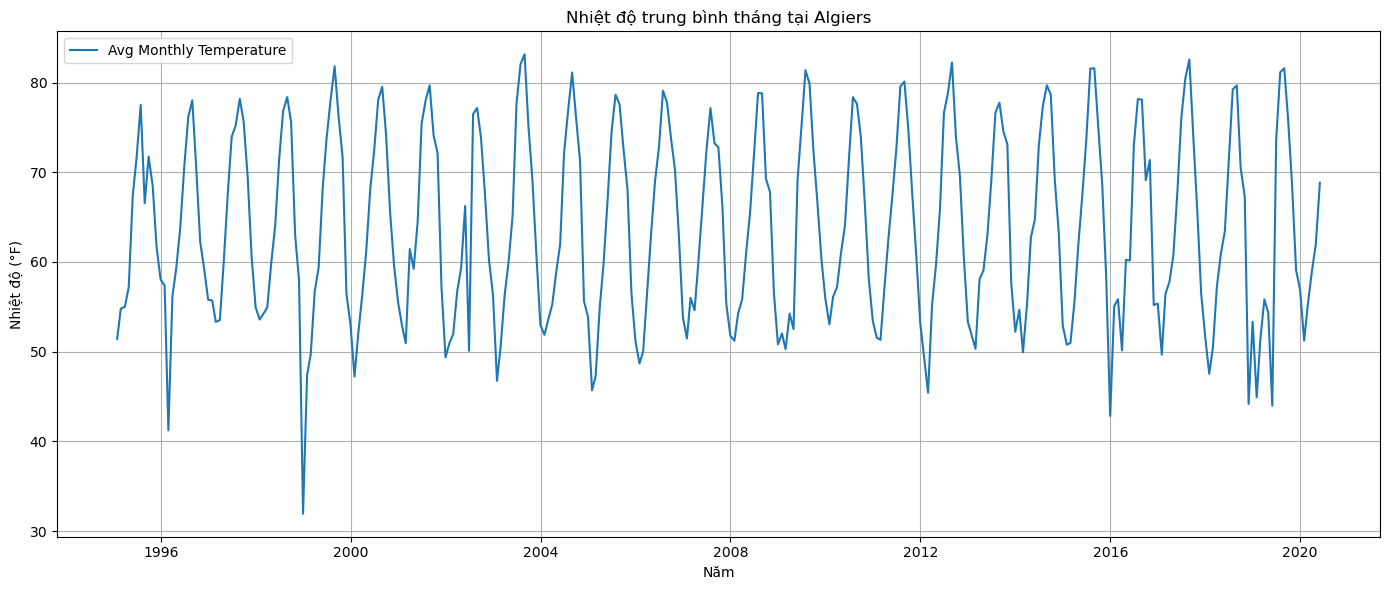

In [14]:
import matplotlib.pyplot as plt

# Chuyển cột Date sang định dạng datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample theo tháng để làm mượt chuỗi
monthly_temp = df['AvgTemperature'].resample('M').mean()

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(monthly_temp, label='Avg Monthly Temperature')
plt.title("Nhiệt độ trung bình tháng tại Algiers")
plt.xlabel("Năm")
plt.ylabel("Nhiệt độ (°F)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Classical Decomposition

C:\Users\PC\AppData\Local\Temp\ipykernel_2956\167622677.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['AvgTemperature'].resample('M').mean()


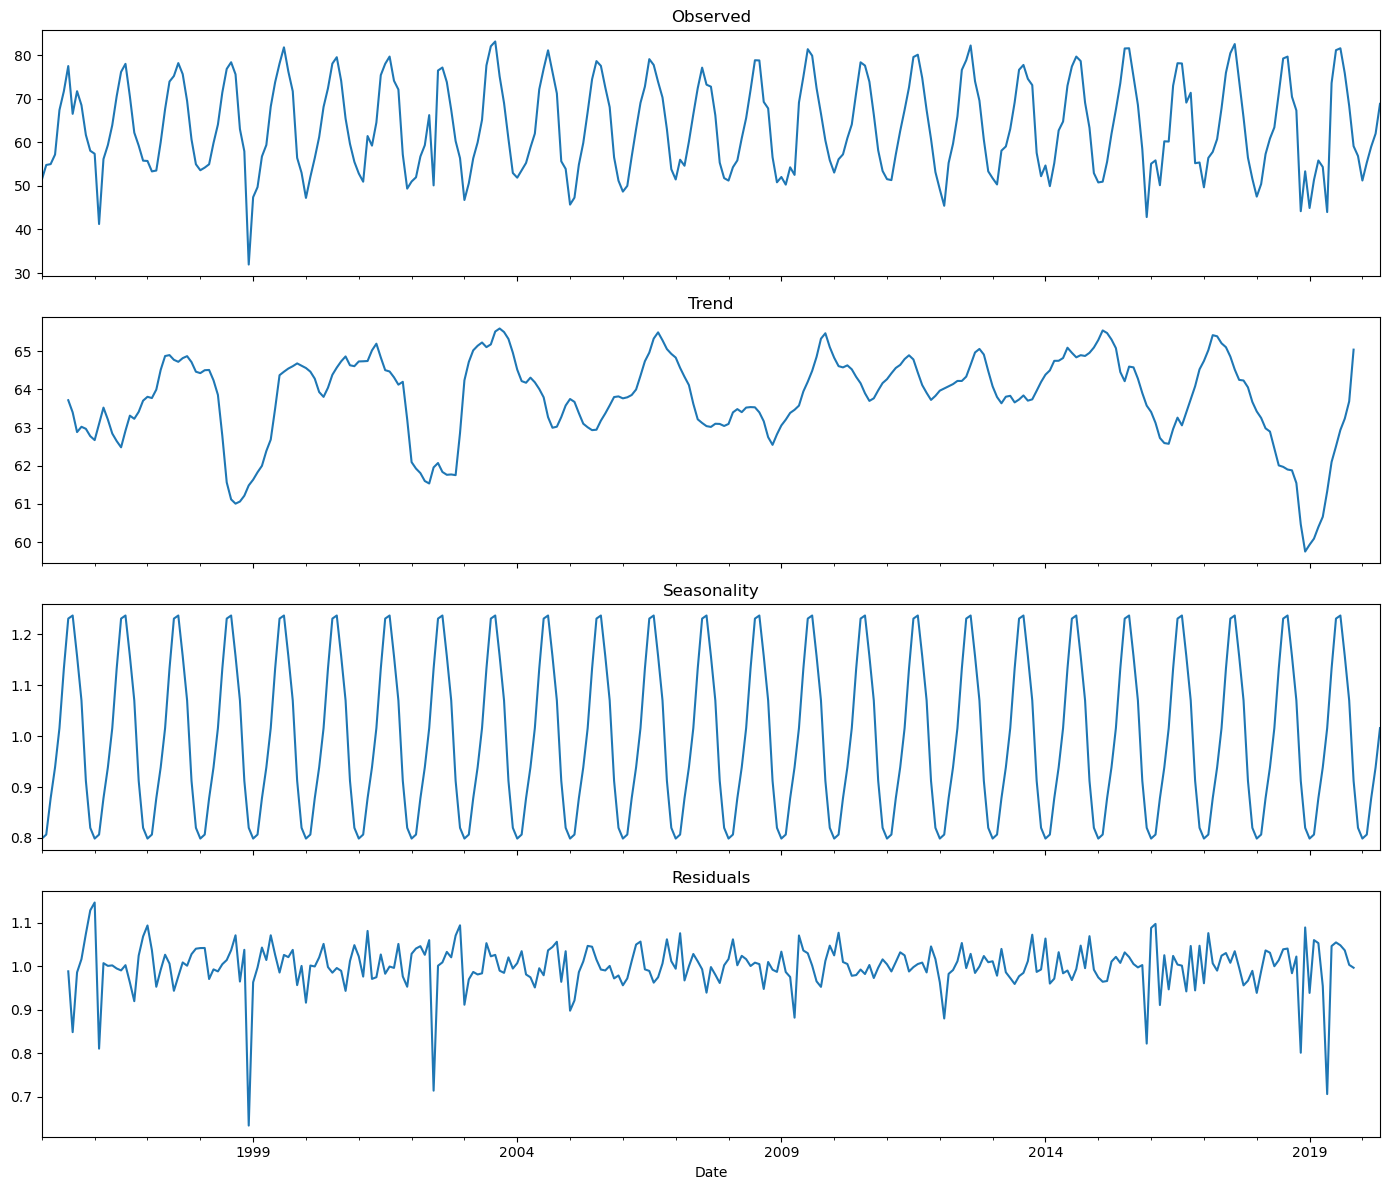

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Đọc dữ liệu
df = pd.read_csv("Algiers.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample dữ liệu theo tháng để làm mượt chuỗi
monthly_temp = df['AvgTemperature'].resample('M').mean()

# Phân rã chuỗi theo mô hình multiplicative hoặc additive (tùy chuỗi)
# multiplicative thường dùng khi seasonal tăng/giảm theo level
decomposition = seasonal_decompose(monthly_temp, model='multiplicative', period=12)

# Vẽ các thành phần: quan sát, xu hướng, mùa vụ, phần dư
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
decomposition.observed.plot(ax=axs[0], title='Observed')
decomposition.trend.plot(ax=axs[1], title='Trend')
decomposition.seasonal.plot(ax=axs[2], title='Seasonality')
decomposition.resid.plot(ax=axs[3], title='Residuals')
plt.tight_layout()
plt.show()


# Seasonal ARIMA

C:\Users\PC\AppData\Local\Temp\ipykernel_2956\3327533031.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['AvgTemperature'].resample('M').mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_2956\3327533031.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_temp.index[-1] + pd.offsets.MonthBegin(),


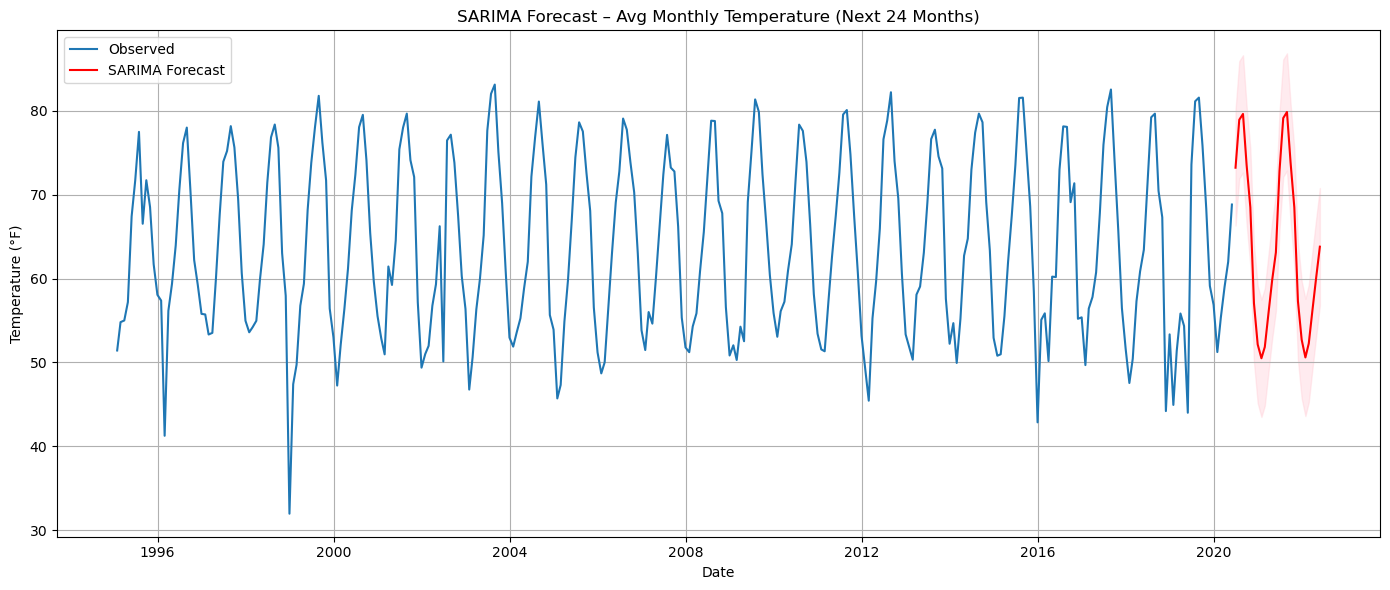

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Đọc và chuẩn bị dữ liệu
df = pd.read_csv("Algiers.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample theo tháng (làm mượt)
monthly_temp = df['AvgTemperature'].resample('M').mean()

# Xây dựng mô hình SARIMA
# SARIMA(p, d, q)(P, D, Q, s)
# Ở đây ta chọn thử: (1,1,1)(1,1,1,12) – tinh chỉnh bằng AIC/BIC sau
model = SARIMAX(monthly_temp,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Huấn luyện mô hình
results = model.fit(disp=False)

# Dự báo 24 tháng tiếp theo
forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()
forecast_index = pd.date_range(start=monthly_temp.index[-1] + pd.offsets.MonthBegin(), 
                               periods=forecast_steps, freq='M')

# Lấy giá trị dự báo và khoảng tin cậy
predicted_mean = forecast.predicted_mean.values
lower_ci = forecast_ci.iloc[:, 0].astype(float).values
upper_ci = forecast_ci.iloc[:, 1].astype(float).values

# Vẽ kết quả dự báo
plt.figure(figsize=(14, 6))
plt.plot(monthly_temp, label='Observed')
plt.plot(forecast_index, predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(forecast_index, lower_ci, upper_ci, color='pink', alpha=0.3)
plt.title("SARIMA Forecast – Avg Monthly Temperature (Next 24 Months)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
